# Fixed Timestep 4th-order Runge-Kutta Kepler Solver

### Imports

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Constants

Assuming natural units for the problem  (a = M = G = 1)

In [129]:
a = 1
G = 1
M = 1

### Initial conditions

In [134]:
#Eccentricity
e1 = 0

#Initial position and velocity
rp = a*(1-e1)
vp = math.sqrt(G*M/a)*math.sqrt((1+e1)/(1-e1))

### Runge-Kutta function implementation

Takes in initial positions, initial velocities, timestep (as a fraction of the period), and the desired number of orbits. 
Outputs a position vector array and a velocity vector array.

In [161]:
def RK4_Kepler_fixed(r_initial_x, r_initial_y, v_initial_x, v_initial_y, dt, N_orbits):
    
    #imports 
    import numpy as np
    import math
    
    # total number of steps (rounded to the nearest step)
    N_steps = N_steps = int(np.round((2*np.pi)*N_orbits / dt))

    # define function for velocity equation
    def f(r):
        return -1/(np.linalg.norm(r)**3) * r
        
    # initialize arrays
    r = np.concatenate((np.array([[r_initial_x,r_initial_y]]),np.zeros((N_steps,2))))
    v = np.concatenate((np.array([[v_initial_x,v_initial_y]]),np.zeros((N_steps,2))))

    # loop over all the positions
    for n in range(N_steps):

        # calculate the k's
        k1r = v[n]
        k1v = f(r[n])
        
        k2r = v[n] + k1v*dt*0.5
        k2v = f(r[n] + k1r*dt*0.5)
        
        k3r = v[n] + k2v*dt*0.5
        k3v = f(r[n] + k2r*dt*0.5)
        
        k4r = v[n] + k3v*dt
        k4v = f(r[n] + k3r*dt)
        
        # update r vector
        r[n+1] = r[n] + (k1r/6 + k2r/3 + k3r/3 + k4r/6)*dt

        # update v vector
        v[n+1] = v[n] + (k1v/6 + k2v/3 + k3v/3 + k4v/6)*dt
        
    return r, v

### Estimating a circular (e = 0) orbit

For 3 increasingly smaller time-step settings.

In [136]:
dt1 = 1/12
r_circ_fixed_1, v_circ_fixed_1 = RK4_Kepler_fixed(0, rp, -vp, 0, dt1, 1)

dt2 = 1/48
r_circ_fixed_2, v_circ_fixed_2 = RK4_Kepler_fixed(0, rp, -vp, 0, dt2, 1)

dt3 = 1/365.25
r_circ_fixed_3, v_circ_fixed_3 = RK4_Kepler_fixed(0, rp, -vp, 0, dt3, 1)

### Plotting

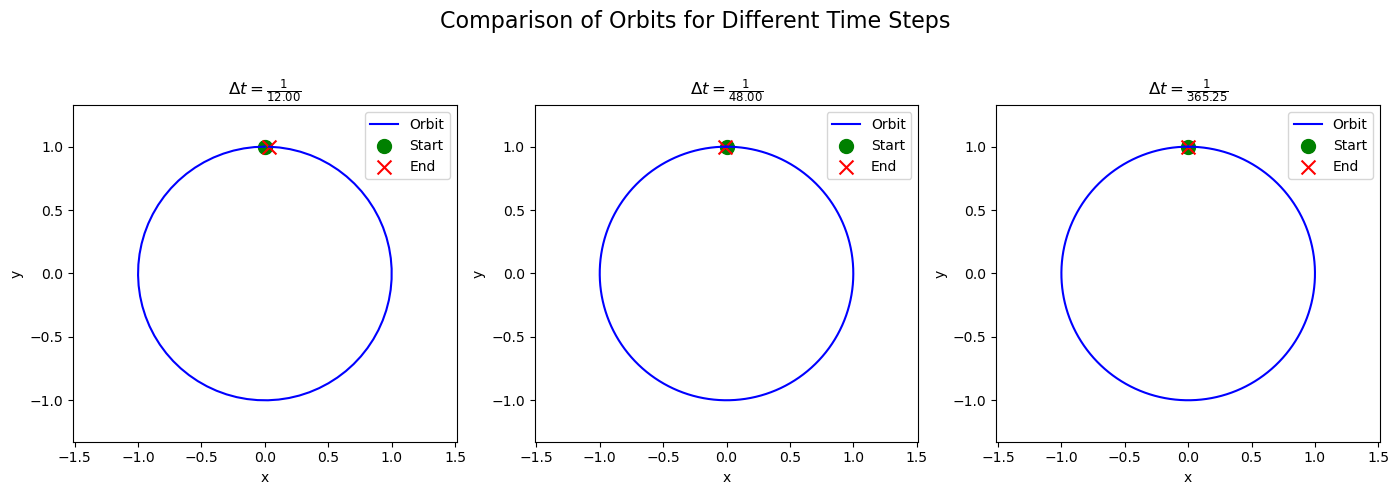

In [137]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5))

# plotting function
def plot_orbit(ax, r, dt):

    # plot trajectory
    ax.plot(r[:, 0], r[:, 1], color='blue', label='Orbit')
    
    # mark start and end of orbit
    ax.scatter(r[0, 0], r[0, 1], color='green', marker='o', s=100, label='Start')
    ax.scatter(r[-1, 0], r[-1, 1], color='red', marker='x', s=100, label='End')

    # labels
    ax.set_title(r"$\Delta t = \frac{1}{" + f"{1/dt:.2f}" + r"}$")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.axis("equal")
    ax.legend()

# plot orbits
plot_orbit(ax1, r_circ_fixed_1, dt1)
plot_orbit(ax2, r_circ_fixed_2, dt2)
plot_orbit(ax3, r_circ_fixed_3, dt3)

# title and adjustments
fig.suptitle("Comparison of Orbits for Different Time Steps", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

### Error comparison

Energy function: takes in a position vector and velocity vector. Outputs an orbital energy.

In [158]:
def Energy(r,v,G,M):
    import math
    import numpy.linalg as la
    return 0.5*(la.norm(v)) - G*M/la.norm(r)

Comparing final position errors:

In [163]:
# errors 
pos_error1 = np.linalg.norm(r_circ_fixed_1[-1] - r_circ_fixed_1[0])/np.linalg.norm(r_circ_fixed_1[0])
pos_error2 = np.linalg.norm(r_circ_fixed_2[-1] - r_circ_fixed_2[0])/np.linalg.norm(r_circ_fixed_2[0])
pos_error3 = np.linalg.norm(r_circ_fixed_3[-1] - r_circ_fixed_3[0])/np.linalg.norm(r_circ_fixed_3[0])

# print results
print(f"The relative error in the energy for dt = 1/{int(1/dt1)} is {pos_error1:.2E}.")
print(f"The relative error in the energy for dt = 1/{int(1/dt2)} is {pos_error2:.2E}.")
print(f"The relative error in the energy for dt = 1/{1/dt3:.2f} is {pos_error3:.2E}.")

The relative error in the energy for dt = 1/12 is 3.32E-02.
The relative error in the energy for dt = 1/48 is 8.48E-03.
The relative error in the energy for dt = 1/365.25 is 1.82E-04.


Comparing orbital energy errors:

In [164]:
# initial energy
initial_energy = Energy(np.array([0,rp]),np.array([-vp,0]),1,1)

# final energies of each orbit
final_energy1 = Energy(r_circ_fixed_1[-1],v_circ_fixed_1[-1],1,1)
final_energy2 = Energy(r_circ_fixed_2[-1],v_circ_fixed_2[-1],1,1)
final_energy3 = Energy(r_circ_fixed_3[-1],v_circ_fixed_3[-1],1,1)

# errors
E_error1 = abs((initial_energy - final_energy1)/initial_energy)
E_error2 = abs((initial_energy - final_energy2)/initial_energy)
E_error3 = abs((initial_energy - final_energy3)/initial_energy)

# print results
print(f"The relative error in the energy for dt = 1/{int(1/dt1)} is {E_error1:.2E}.")
print(f"The relative error in the energy for dt = 1/{int(1/dt2)} is {E_error2:.2E}.")
print(f"The relative error in the energy for dt = 1/{1/dt3:.2f} is {E_error3:.2E}.")

The relative error in the energy for dt = 1/12 is 1.05E-06.
The relative error in the energy for dt = 1/48 is 1.03E-09.
The relative error in the energy for dt = 1/365.25 is 3.73E-14.


### Estimating an eccentric (e = 0.96) orbit

In [165]:
#Eccentricity
e2 = 0.96

#Initial position and velocity
rp2 = a*(1-e2)
vp2 = math.sqrt(G*M/a)*math.sqrt((1+e2)/(1-e2))

Call RK4 function again:

In [166]:
r_ecc_fixed_1, v_ecc_fixed_1 = RK4_Kepler_fixed(0, rp2, -vp2, 0, dt1, 1)
r_ecc_fixed_2, v_ecc_fixed_2 = RK4_Kepler_fixed(0, rp2, -vp2, 0, dt2, 1)
r_ecc_fixed_3, v_ecc_fixed_3 = RK4_Kepler_fixed(0, rp2, -vp2, 0, dt3, 1)

Plotting:

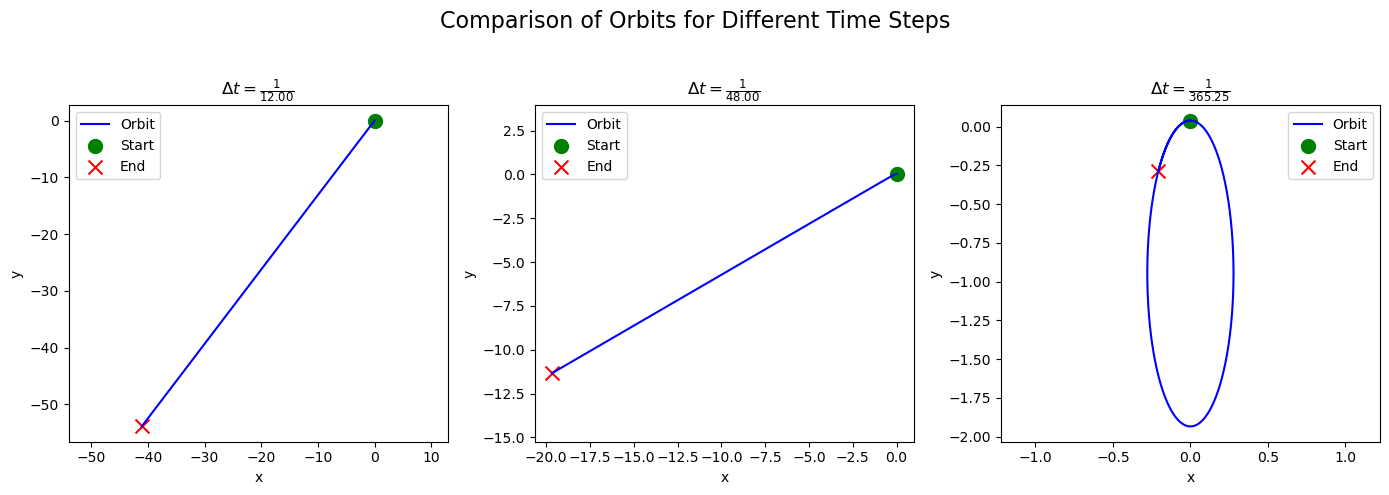

In [167]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5))

# plotting
plot_orbit(ax1, r_ecc_fixed_1, dt1)
plot_orbit(ax2, r_ecc_fixed_2, dt2)
plot_orbit(ax3, r_ecc_fixed_3, dt3)

# title and adjustments
fig.suptitle("Comparison of Orbits for Different Time Steps", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

Comparing final position errors:

In [168]:
# errors 
ecc_pos_error1 = np.linalg.norm(r_ecc_fixed_1[-1] - r_ecc_fixed_1[0])/np.linalg.norm(r_ecc_fixed_1[0])
ecc_pos_error2 = np.linalg.norm(r_ecc_fixed_2[-1] - r_ecc_fixed_2[0])/np.linalg.norm(r_ecc_fixed_2[0])
ecc_pos_error3 = np.linalg.norm(r_ecc_fixed_3[-1] - r_ecc_fixed_3[0])/np.linalg.norm(r_ecc_fixed_3[0])

# print results
print(f"The relative error in the energy for dt = 1/{int(1/dt1)} is {ecc_pos_error1:.2E}.")
print(f"The relative error in the energy for dt = 1/{int(1/dt2)} is {ecc_pos_error2:.2E}.")
print(f"The relative error in the energy for dt = 1/{1/dt3:.2f} is {ecc_pos_error3:.2E}.")

The relative error in the energy for dt = 1/12 is 6.78E+01.
The relative error in the energy for dt = 1/48 is 2.27E+01.
The relative error in the energy for dt = 1/365.25 is 3.86E-01.


Comparing orbital energy errors:

In [169]:
# initial energy
initial_energy = Energy(np.array([0,rp2]),np.array([-vp2,0]),1,1)

# final energies of each orbit
final_energy1 = Energy(r_ecc_fixed_1[-1],v_ecc_fixed_1[-1],1,1)
final_energy2 = Energy(r_ecc_fixed_2[-1],v_ecc_fixed_2[-1],1,1)
final_energy3 = Energy(r_ecc_fixed_3[-1],v_ecc_fixed_3[-1],1,1)

# errors
error1 = abs((initial_energy - final_energy1)/initial_energy)
error2 = abs((initial_energy - final_energy2)/initial_energy)
error3 = abs((initial_energy - final_energy3)/initial_energy)

# print results
print(f"The relative error in the energy for dt = 1/{int(1/dt1)} is {error1:.2E}.")
print(f"The relative error in the energy for dt = 1/{int(1/dt2)} is {error2:.2E}.")
print(f"The relative error in the energy for dt = 1/{1/dt3:.2f} is {error3:.2E}.")

The relative error in the energy for dt = 1/12 is 1.25E+00.
The relative error in the energy for dt = 1/48 is 1.08E+00.
The relative error in the energy for dt = 1/365.25 is 9.18E-01.


# Adaptive Timestep 4th-order Runge-Kutta Kepler Solver

### Initial Conditions and Constants

In [224]:
#Constants
G = 1
M = 1
a = 1

#Eccentricity
e = 0.96

#Initial position and velocity
rp = a*(1-e)
vp = math.sqrt(G*M/a)*math.sqrt((1+e)/(1-e))

### Runge-Kutta function with adaptive timestepping

In [225]:
def RK4_Kepler_adapt(r_initial_x, r_initial_y, v_initial_x, v_initial_y, goal_error, N_orbits):
    
    #imports 
    import numpy as np
    import math

    # initialize lists
    r_initial = [r_initial_x,r_initial_y]
    v_initial = [v_initial_x,v_initial_y]
    r = [r_initial]
    v = [v_initial]

    # calculate starting polar angle
    theta_prev = np.arctan2(r_initial_y, r_initial_x)

    # initialize the accumulative angle
    theta_accum = 0

    # initial timestep of one month
    dt = 1/12
    
    # define function for velocity equation
    def f(r):
        return -1/(np.linalg.norm(r)**3) * r
    
    #define a function that steps forward given a timestep
    def RK4_step(r,v,dt):
        
        # calculate the k's
        k1r = v
        k1v = f(r)
        
        k2r = v + k1v*dt*0.5
        k2v = f(r + k1r*dt*0.5)
        
        k3r = v + k2v*dt*0.5
        k3v = f(r + k2r*dt*0.5)
        
        k4r = v + k3v*dt
        k4v = f(r + k3r*dt)
        
        # update r vector
        r_new = r + (k1r/6 + k2r/3 + k3r/3 + k4r/6)*dt

        # update v vector
        v_new = v + (k1v/6 + k2v/3 + k3v/3 + k4v/6)*dt
        
        return r_new, v_new

    # orbit counter
    orbit_counter = 0

    # step counter
    i = 0

    # loop until the desired number of orbits is completed
    while orbit_counter < N_orbits:

        # compute a timestep
        r_new1, v_new1 = RK4_step(np.array(r[i]),np.array(v[i]),dt)

        # compute the same timestep over two steps
        r_temp, v_temp = RK4_step(np.array(r[i]),np.array(v[i]),dt*0.5)
        r_new2, v_new2 = RK4_step(r_temp,v_temp,dt*0.5)

        # compute relative error
        rel_error = abs(np.linalg.norm(r_new1 - r_new2)/np.linalg.norm(r_new2))

        # update timestep
        dt *= (goal_error/rel_error)**(1/5)

        # keep trying if the error is too large
        while rel_error > goal_error:
            
            # compute a timestep
            r_new1, v_new1 = RK4_step(np.array(r[i]),np.array(v[i]),dt)

            # compute the same timestep over two steps
            r_temp, v_temp = RK4_step(np.array(r[i]),np.array(v[i]),dt*0.5)
            r_new2, v_new2 = RK4_step(r_temp,v_temp,dt*0.5)

            # compute relative error
            rel_error = abs(np.linalg.norm(r_new1 - r_new2)/np.linalg.norm(r_new2))

            #update timestep
            dt *= (goal_error/rel_error)**(1/5)

        #add our new computed values to the lists
        r.append(r_new2)
        v.append(v_new2)

        # increment step counter
        i += 1

        # compute the current polar angle
        theta_current = np.arctan2(r_new2[1], r_new2[0])
        
        # find the change in angle, taking care of the 2pi discontinuity:
        dtheta = theta_current - theta_prev
        if dtheta < -np.pi:
            dtheta += 2*np.pi
        elif dtheta > np.pi:
            dtheta -= 2*np.pi
        theta_accum += dtheta
        theta_prev = theta_current

        # if the accumulated angle exceeds 2pi, we count one orbit.
        if theta_accum >= 2*np.pi:
            orbit_counter += 1
            theta_accum -= 2*np.pi
        
    return r, v, i

Call RK4 adaptive function

In [226]:
r_adapt_1, v_adapt_1, num_steps = RK4_Kepler_adapt(0, rp2, -vp2, 0, 1E-5, 1)

Plotting

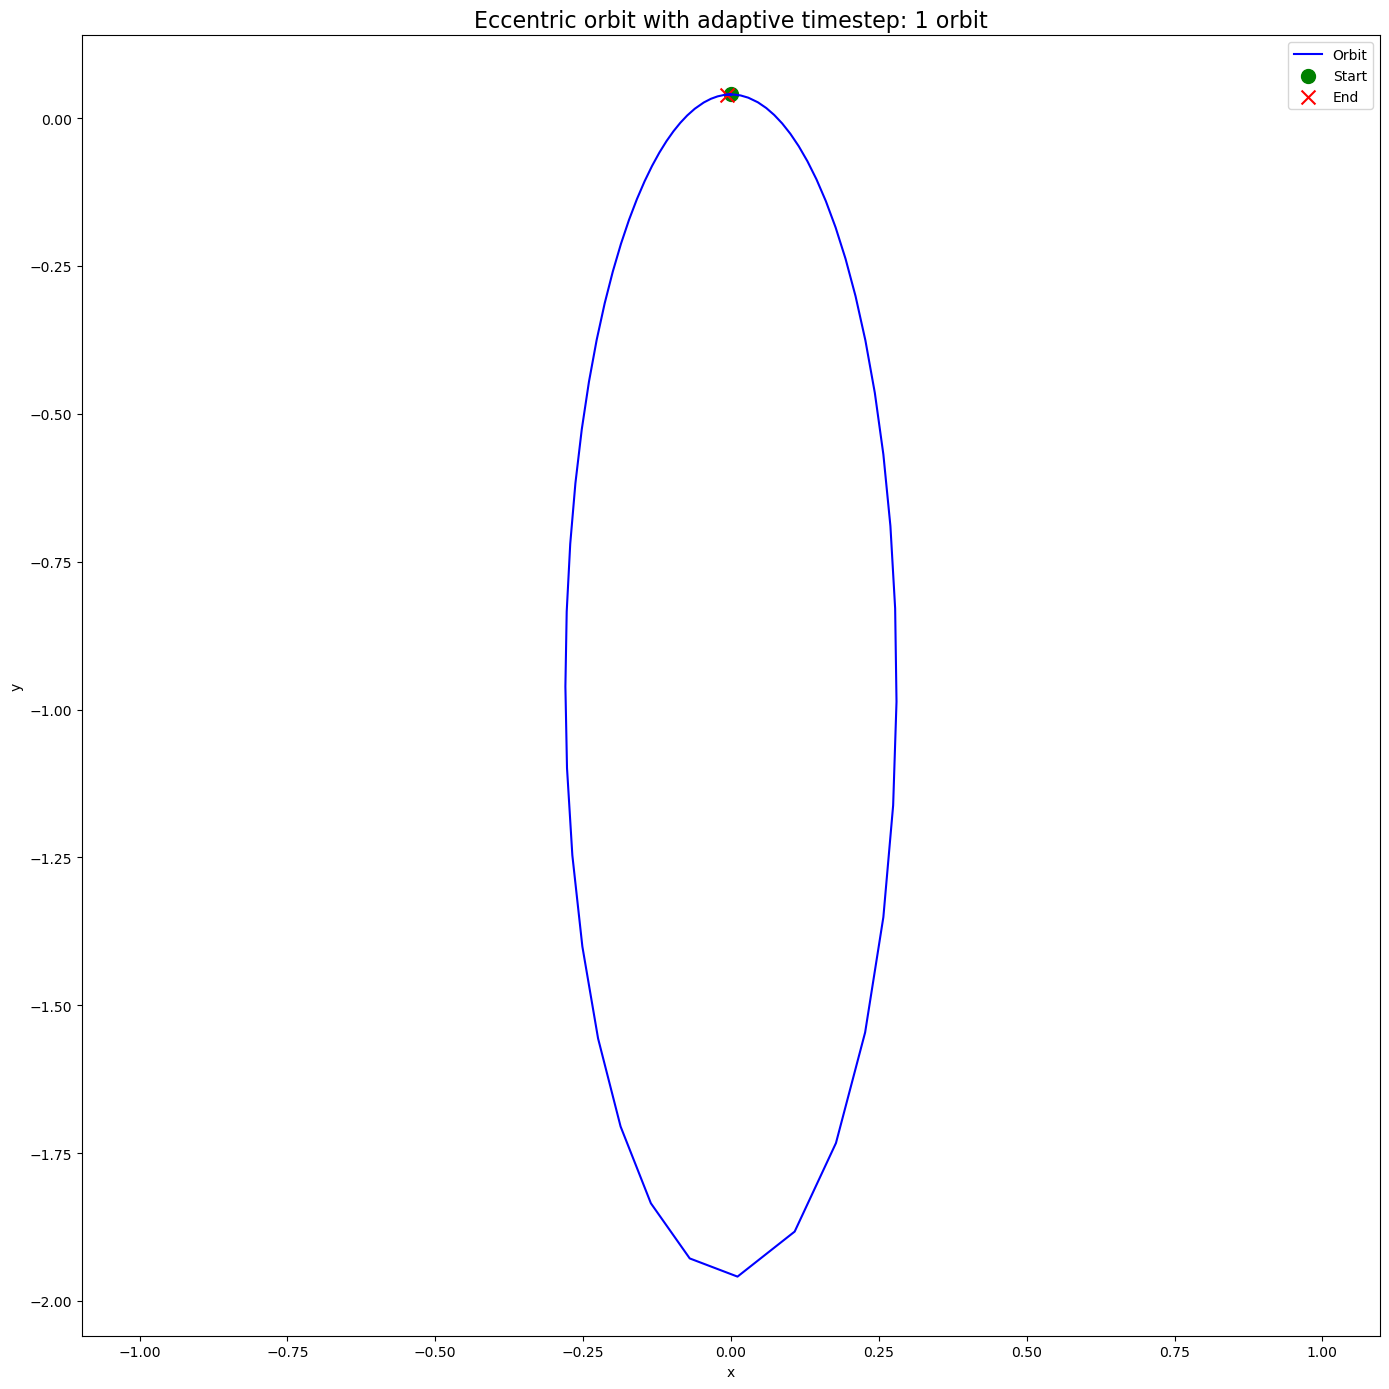

In [227]:
fig, ax = plt.subplots(figsize=(14, 14))

# plotting
plot_orbit(ax, np.array(r_adapt_1), 1)


# title and adjustments
ax.set_title("Eccentric orbit with adaptive timestep: 1 orbit", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 1])

plt.show()

Number of timesteps

In [233]:
print(f"The number of timesteps taken was {num_steps}.")

The number of timesteps taken was 59.


Energy Conservation

In [234]:
# initial energy
initial_energy = Energy(np.array([0,rp]),np.array([-vp,0]),1,1)

# final energies of each orbit
final_energy = Energy(r_adapt_1[-1],v_adapt_1[-1],1,1)

# errors
E_error = abs((initial_energy - final_energy)/initial_energy)

# print results
print(f"The relative error in the energy is {E_error:.2E}.")

The relative error in the energy is 8.44E-03.


### 25 orbits:

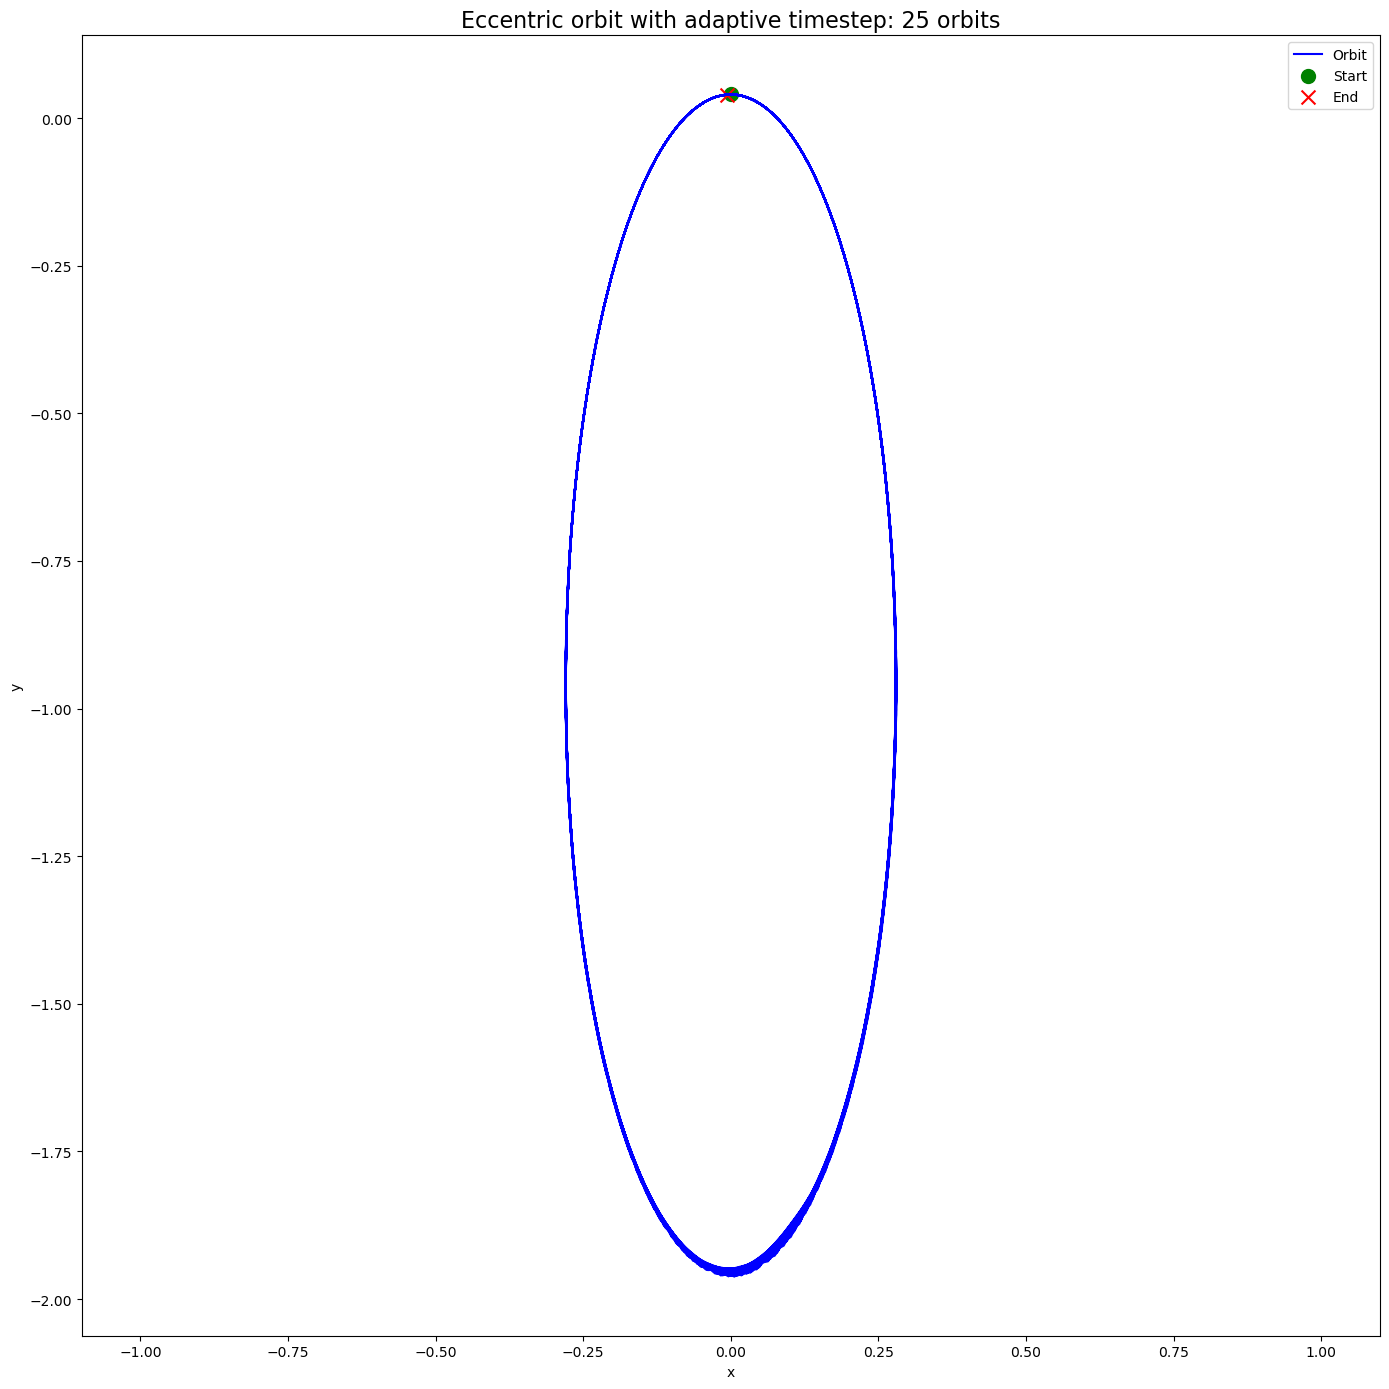

In [235]:
r_adapt_25, v_adapt_25, num_steps_25 = RK4_Kepler_adapt(0, rp2, -vp2, 0, 1E-5, 25)

fig, ax = plt.subplots(figsize=(14, 14))

# plotting
plot_orbit(ax, np.array(r_adapt_25), 1)


# title and adjustments
ax.set_title("Eccentric orbit with adaptive timestep: 25 orbits", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 1])

plt.show()

Energy Conservation

In [232]:
# initial energy
initial_energy = Energy(np.array([0,rp]),np.array([-vp,0]),1,1)

# final energies of each orbit
final_energy = Energy(r_adapt_25[-1],v_adapt_25[-1],1,1)

# errors
E_error = abs((initial_energy - final_energy)/initial_energy)

# print results
print(f"The relative error in the energy is {E_error:.2E}.")

The relative error in the energy is 5.75E-03.


This would not work well for integrating over billions of orbits. The error actually shrunk, but thats not necessarily going to continue, and it is much larger than 1/(the number of orbits needed), so it will drastically accumulate.

In [239]:
print(f"The number of timesteps taken was {num_steps_25}.")

The number of timesteps taken was 1460.
